In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import plotly.express as px

# Data Inspection

In [4]:
df = pd.read_csv("Orange Quality Data.csv")
df.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


In [ ]:
df.describe()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,7.844813,205.128631,10.907884,3.473900,3.072614,15.344398,3.599585,3.817427
std,1.086002,56.461012,2.760446,0.421007,1.323630,5.323852,1.205214,1.014410
min,6.000000,100.000000,5.500000,2.800000,1.000000,4.000000,1.000000,1.000000
25%,6.900000,155.000000,8.500000,3.200000,2.000000,11.000000,3.000000,3.000000
50%,7.800000,205.000000,11.000000,3.400000,3.000000,15.000000,4.000000,4.000000
75%,8.700000,252.000000,13.400000,3.800000,4.000000,20.000000,4.500000,4.500000
max,10.000000,300.000000,16.000000,4.400000,5.000000,25.000000,5.000000,5.000000


In [ ]:
df.isnull().sum()

Size (cm)             0
Weight (g)            0
Brix (Sweetness)      0
pH (Acidity)          0
Softness (1-5)        0
HarvestTime (days)    0
Ripeness (1-5)        0
Color                 0
Variety               0
Blemishes (Y/N)       0
Quality (1-5)         0
dtype: int64

In [ ]:
print("Color: " + str(df["Color"].unique()) + "\n")

print("Variety: " + str(df["Variety"].unique()) + "\n")

print("Blemishes: " + str(df["Blemishes (Y/N)"].unique()) + "\n")

Color: ['Orange' 'Deep Orange' 'Light Orange' 'Orange-Red' 'Yellow-Orange']

Variety: ['Valencia' 'Navel' 'Cara Cara' 'Blood Orange' 'Hamlin' 'Tangelo (Hybrid)'
 'Murcott (Hybrid)' 'Moro (Blood)' 'Jaffa' 'Clementine' 'Washington Navel'
 'Star Ruby' 'Tangerine' 'Ambiance' 'California Valencia'
 'Honey Tangerine' 'Navel (Late Season)' 'Clementine (Seedless)' 'Temple'
 'Minneola (Hybrid)' 'Satsuma Mandarin' 'Midsweet (Hybrid)'
 'Navel (Early Season)' 'Ortanique (Hybrid)']

Blemishes: ['N' 'Y (Minor)' 'Y (Sunburn)' 'Y (Mold Spot)' 'Y (Bruise)'
 'Y (Split Skin)' 'Y (Sunburn Patch)' 'Y (Scars)'
 'Y (Minor Insect Damage)' 'Y (Bruising)' 'N (Minor)' 'N (Split Skin)']



In [ ]:
variety = df["Variety"].unique()
print("Variety counts: ")
for v in variety:
    count = df[df["Variety"] == v].shape[0]  # Count occurrences of each variety
    print("\t " + v + " - " + str(count))

variety = df["Color"].unique()
print("\nColor counts: ")
for v in variety:
    count = df[df["Color"] == v].shape[0]  # Count occurrences of each Color
    print("\t " + v + " - " + str(count))

variety = df["Blemishes (Y/N)"].unique()
print("\nBlemish counts: ")
for v in variety:
    count = df[df["Blemishes (Y/N)"] == v].shape[0]  # Count occurrences of each Blemish
    print("\t " + v + " - " + str(count))

Variety counts: 
	 Valencia - 11
	 Navel - 16
	 Cara Cara - 21
	 Blood Orange - 2
	 Hamlin - 5
	 Tangelo (Hybrid) - 1
	 Murcott (Hybrid) - 3
	 Moro (Blood) - 16
	 Jaffa - 11
	 Clementine - 14
	 Washington Navel - 14
	 Star Ruby - 18
	 Tangerine - 14
	 Ambiance - 11
	 California Valencia - 7
	 Honey Tangerine - 7
	 Navel (Late Season) - 3
	 Clementine (Seedless) - 4
	 Temple - 18
	 Minneola (Hybrid) - 12
	 Satsuma Mandarin - 13
	 Midsweet (Hybrid) - 5
	 Navel (Early Season) - 2
	 Ortanique (Hybrid) - 13

Color counts: 
	 Orange - 38
	 Deep Orange - 75
	 Light Orange - 64
	 Orange-Red - 55
	 Yellow-Orange - 9

Blemish counts: 
	 N - 149
	 Y (Minor) - 14
	 Y (Sunburn) - 2
	 Y (Mold Spot) - 10
	 Y (Bruise) - 1
	 Y (Split Skin) - 8
	 Y (Sunburn Patch) - 23
	 Y (Scars) - 17
	 Y (Minor Insect Damage) - 6
	 Y (Bruising) - 9
	 N (Minor) - 1
	 N (Split Skin) - 1


In [7]:
variety = df["Quality (1-5)"].unique()
print("\nQuality counts: ")
for v in variety:
    count = df[df["Quality (1-5)"] == v].shape[0]  # Count occurrences of each Blemish
    print("\t " + str(v) + " - " + str(count))

variety = df["Ripeness (1-5)"].unique()
print("\nRipeness counts: ")
for v in variety:
    count = df[df["Ripeness (1-5)"] == v].shape[0]  # Count occurrences of each Blemish
    print("\t " + str(v) + " - " + str(count))


Quality counts: 
	 4.0 - 76
	 4.5 - 29
	 5.0 - 52
	 3.5 - 23
	 1.0 - 9
	 3.0 - 26
	 2.5 - 12
	 2.0 - 14

Ripeness counts: 
	 4.0 - 52
	 4.5 - 23
	 5.0 - 58
	 3.5 - 12
	 2.0 - 27
	 3.0 - 46
	 2.5 - 6
	 1.0 - 17


***Note:*** All of the rankings (1-5) are categorical variables because these rankings do not live between 1 in 5 continuously

#EDA

In [ ]:
colors = ['#4b0082', '#6a0dad', '#8b5cf6', '#a97dff', '#c4a8ff', '#e1d1ff']
sns.set_palette(sns.color_palette(colors))

In [ ]:
numeric_columns = df.select_dtypes(include=np.number)
correlation_matrix = numeric_columns.corr()

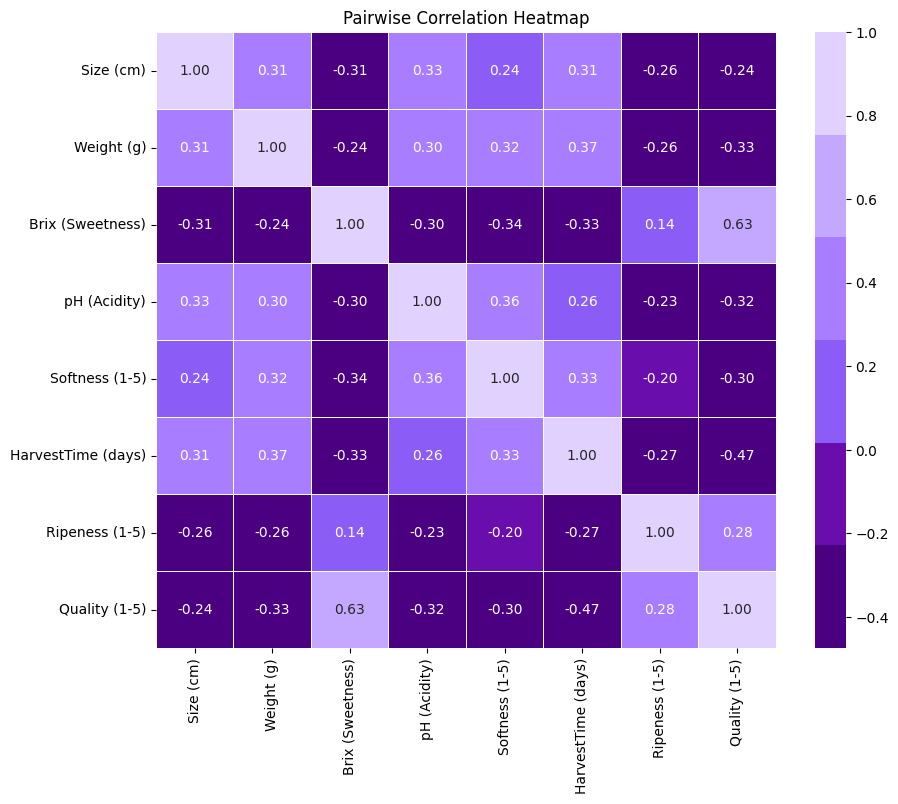

In [ ]:
# @title Pairwise Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=colors, fmt=".2f", linewidths=0.5)
plt.title('Pairwise Correlation Heatmap')
plt.show()

<Figure size 1200x1000 with 0 Axes>

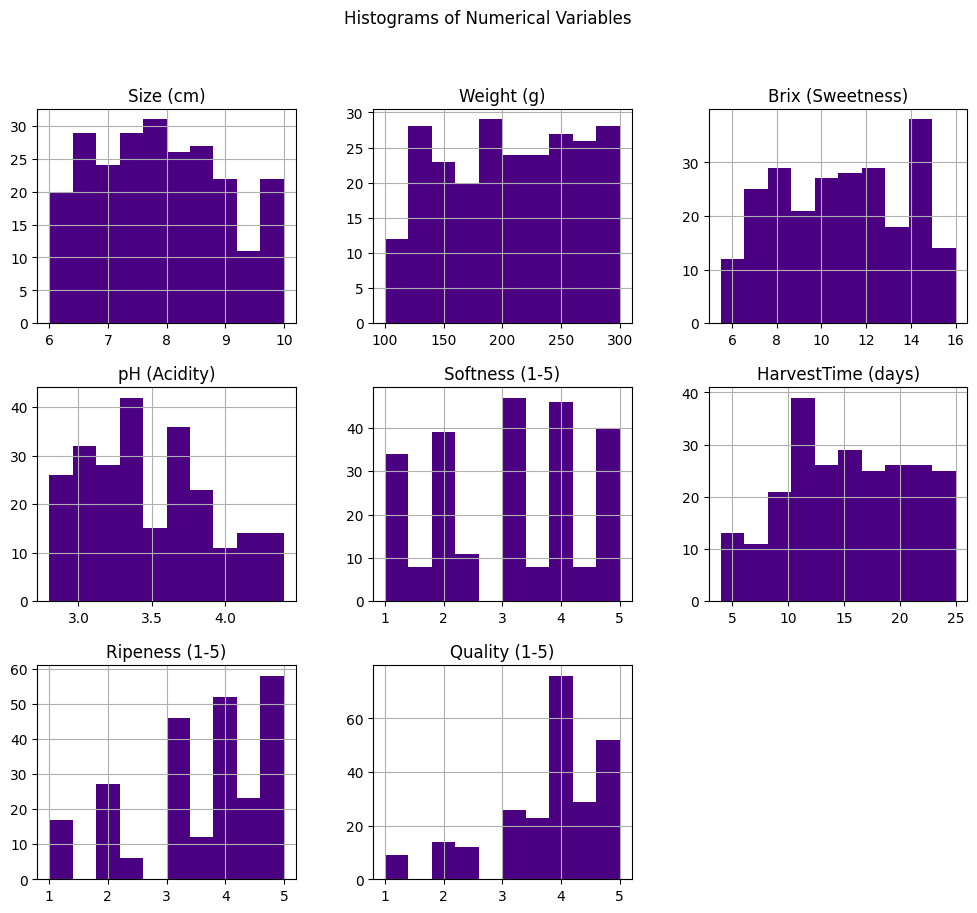

In [ ]:
# @title Histograms of Numerical Variables
plt.figure(figsize=(12, 10))
df.hist(figsize=(12, 10))
plt.suptitle('Histograms of Numerical Variables')
plt.show()

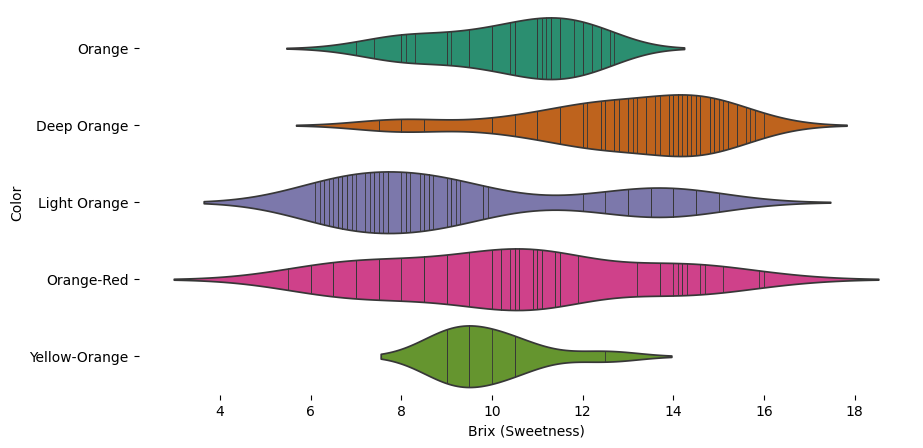

In [ ]:
# @title Color vs Brix (Sweetness)
figsize = (10, 1 * len(df['Color'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data=df, x='Brix (Sweetness)', y='Color', inner='stick', palette='Dark2', hue='Color', legend=False)
sns.despine(top=True, right=True, bottom=True, left=True)

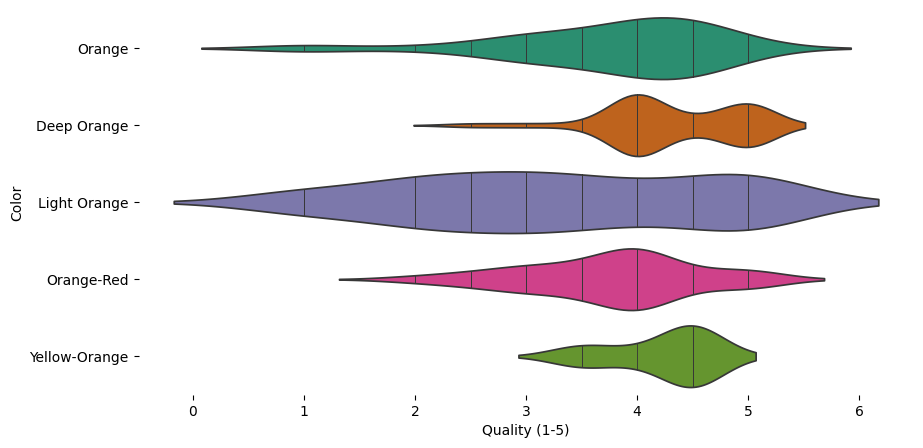

In [ ]:
# @title Color vs Quality
figsize = (10, 1 * len(df['Color'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data=df, x='Quality (1-5)', y='Color', inner='stick', palette='Dark2', hue='Color', legend=False)
sns.despine(top=True, right=True, bottom=True, left=True)

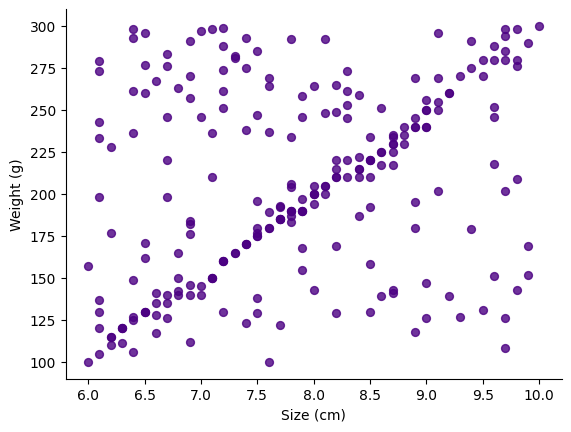

In [ ]:
# @title Size (cm) vs Weight (g)

df.plot(kind='scatter', x='Size (cm)', y='Weight (g)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

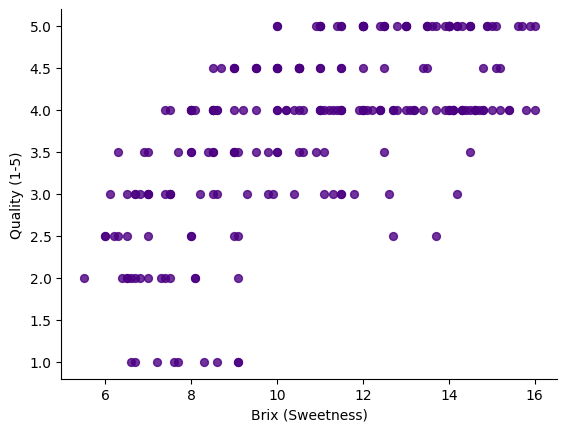

In [ ]:
# @title Sweetness vs  Quality (1-5)

df.plot(kind='scatter', x='Brix (Sweetness)', y="Quality (1-5)", s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

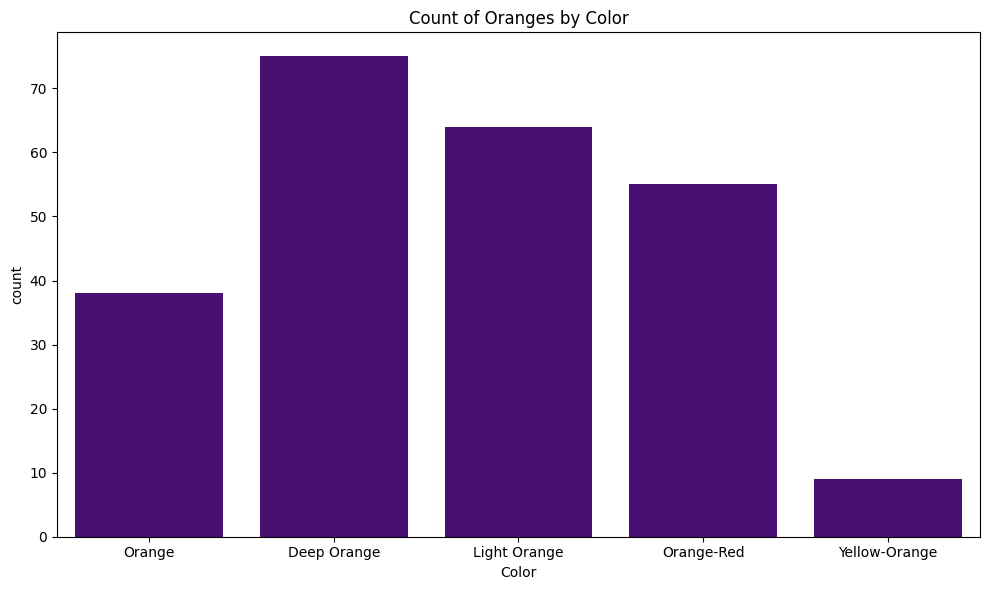

In [ ]:
# @title Count of Oranges By Color
%matplotlib inline

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Color')
plt.title('Count of Oranges by Color')
plt.tight_layout()
plt.show()

#Data Cleaning

In [ ]:
df['Blemish_Type'] = df['Blemishes (Y/N)'].str.extract(r'\((.*?)\)')
df['Blemishes (Y/N)'] = df['Blemishes (Y/N)'].str.replace(r'\(.*?\)', '').str.strip()
df['Blemishes (Y/N)'] = df['Blemishes (Y/N)'].apply(lambda x: 'Y' if x.startswith('Y') else 'N')
df.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5),Blemish_Type
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0,NaN
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5,NaN
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0,NaN
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5,NaN
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y,4.5,Minor


In [ ]:
columns_to_replace_nan = ['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)',
                          'Softness (1-5)', 'Ripeness (1-5)', 'Quality (1-5)', 'Blemish_Type']

df[columns_to_replace_nan] = df[columns_to_replace_nan].fillna(0)

In [ ]:
categorical_cols = ['Color', 'Variety', 'Blemishes (Y/N)', 'Blemish_Type']
data_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

#Data Visualizations

In [ ]:
# Get unique values from 'HarvestTime (days)' column
unique_times = df['HarvestTime (days)'].unique()

# Create a custom palette with the same number of unique values
custom_palette = sns.color_palette("muted", len(unique_times))

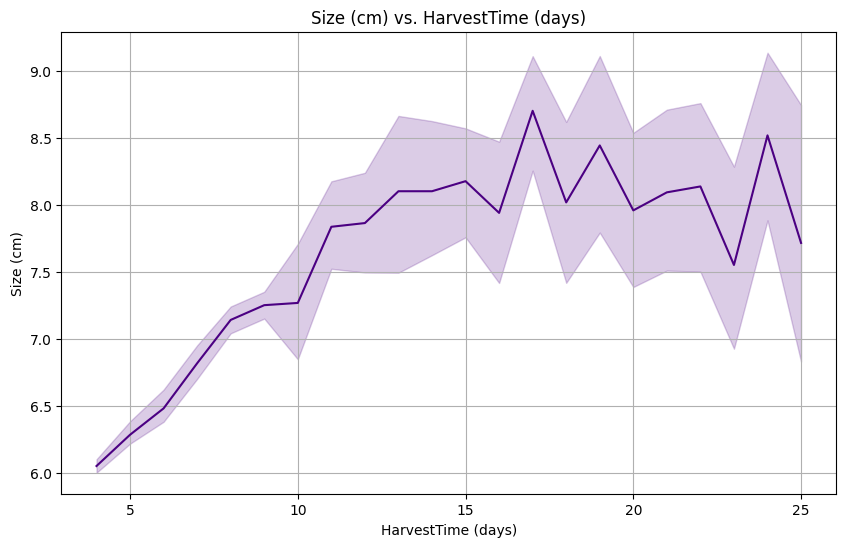

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='HarvestTime (days)', y='Size (cm)', data=df, color=colors[0])
plt.title('Size (cm) vs. HarvestTime (days)')
plt.xlabel('HarvestTime (days)')
plt.ylabel('Size (cm)')
plt.grid(True)
plt.show()

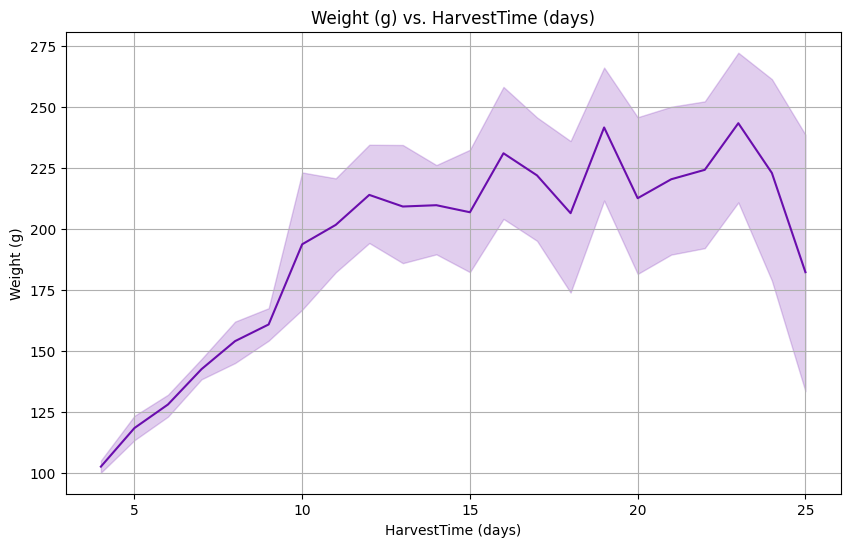

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='HarvestTime (days)', y='Weight (g)', data=df, color=colors[1])
plt.title('Weight (g) vs. HarvestTime (days)')
plt.xlabel('HarvestTime (days)')
plt.ylabel('Weight (g)')
plt.grid(True)
plt.show()

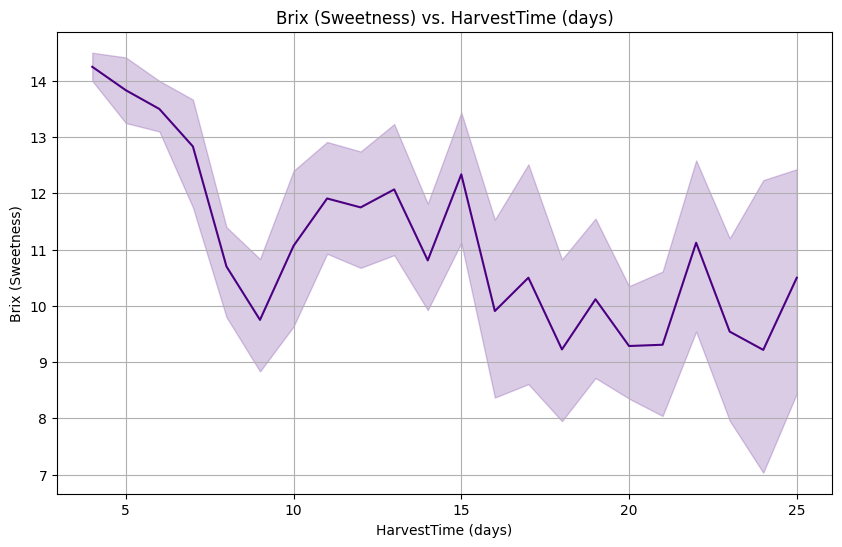

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='HarvestTime (days)', y='Brix (Sweetness)', data=df, color=colors[0])
plt.title('Brix (Sweetness) vs. HarvestTime (days)')
plt.xlabel('HarvestTime (days)')
plt.ylabel('Brix (Sweetness)')
plt.grid(True)
plt.show()

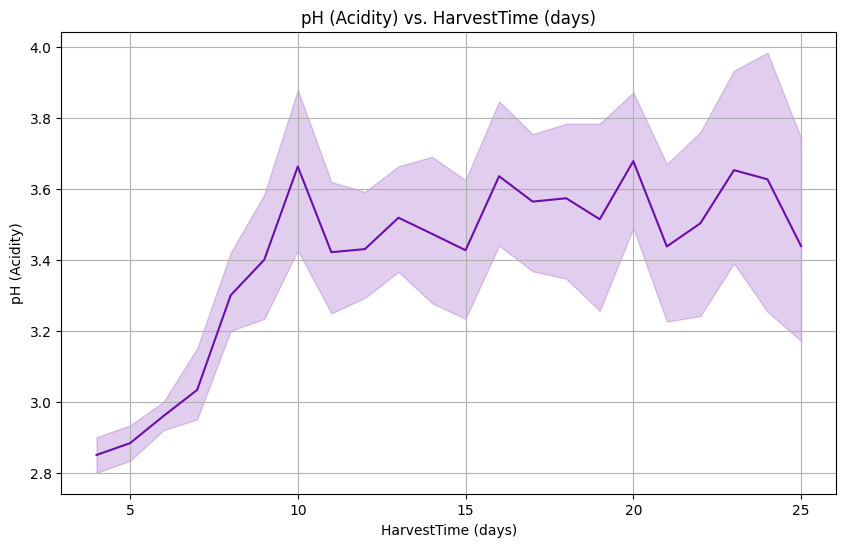

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='HarvestTime (days)', y='pH (Acidity)', data=df, color=colors[1])
plt.title('pH (Acidity) vs. HarvestTime (days)')
plt.xlabel('HarvestTime (days)')
plt.ylabel('pH (Acidity)')
plt.grid(True)
plt.show()

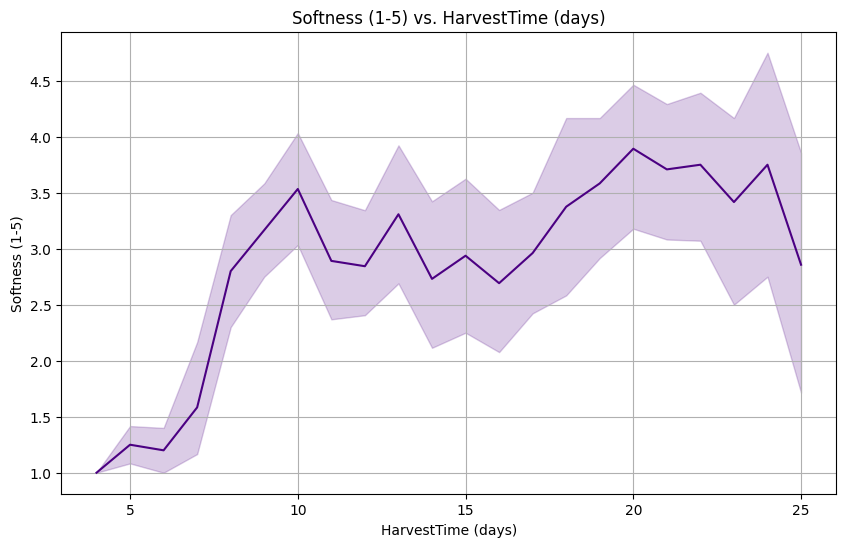

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='HarvestTime (days)', y='Softness (1-5)', data=df, color=colors[0])
plt.title('Softness (1-5) vs. HarvestTime (days)')
plt.xlabel('HarvestTime (days)')
plt.ylabel('Softness (1-5)')
plt.grid(True)
plt.show()

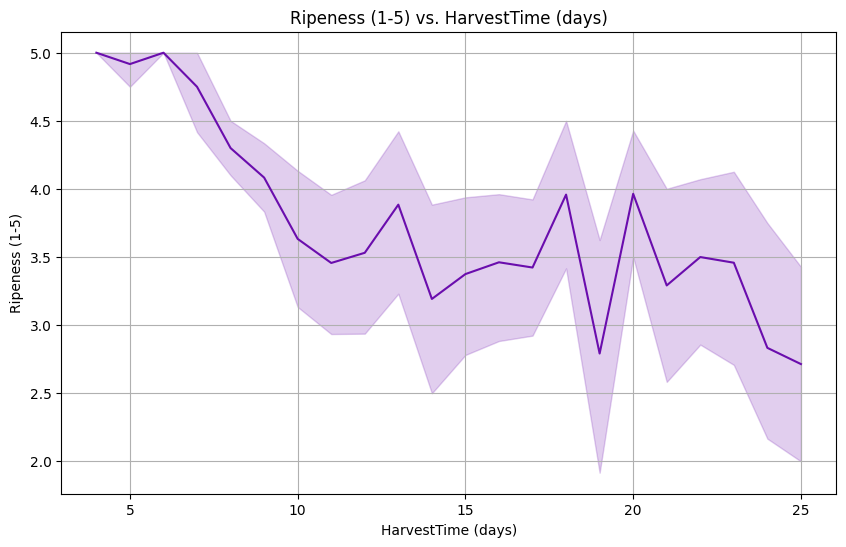

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='HarvestTime (days)', y='Ripeness (1-5)', data=df, color=colors[1])
plt.title('Ripeness (1-5) vs. HarvestTime (days)')
plt.xlabel('HarvestTime (days)')
plt.ylabel('Ripeness (1-5)')
plt.grid(True)
plt.show()

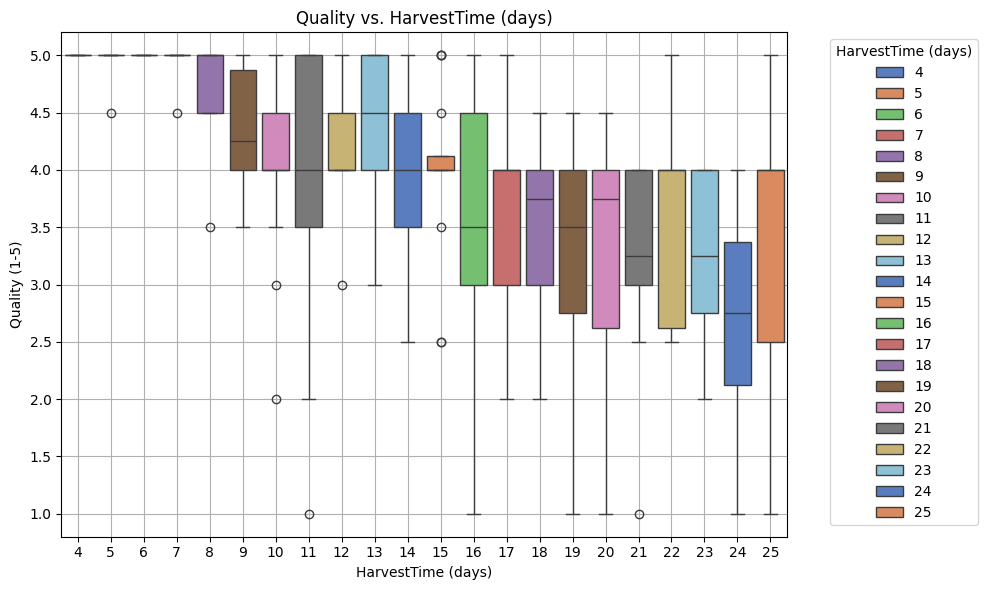

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='HarvestTime (days)', y='Quality (1-5)', data=df, palette=custom_palette, hue='HarvestTime (days)')
plt.title('Quality vs. HarvestTime (days)')
plt.xlabel('HarvestTime (days)')
plt.ylabel('Quality (1-5)')
plt.grid(True)

# Move the legend outside the plot
plt.legend(title='HarvestTime (days)', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

#Linear Regression Evaluation

In [ ]:
X = data_encoded.drop(columns=['HarvestTime (days)'])
y = data_encoded['HarvestTime (days)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

coefficients = pd.DataFrame(model.coef_.reshape(1, -1), columns=X.columns)
coefficients = coefficients.T
coefficients.columns = ['Coefficient']

print("Coefficients:")
print(coefficients)

Mean Squared Error: 15.936498555523881
Coefficients:
                                   Coefficient
Size (cm)                         2.856973e-01
Weight (g)                        1.182785e-02
Brix (Sweetness)                 -1.259275e-01
pH (Acidity)                     -2.530897e+00
Softness (1-5)                    6.046069e-01
Ripeness (1-5)                   -4.724951e-01
Quality (1-5)                    -1.736140e+00
Color_Light Orange               -2.765274e+00
Color_Orange                     -3.685229e-01
Color_Orange-Red                  3.506592e-01
Color_Yellow-Orange              -8.693928e+00
Variety_Blood Orange              5.547302e+00
Variety_California Valencia      -4.757760e-01
Variety_Cara Cara                 1.659964e+00
Variety_Clementine                4.492240e+00
Variety_Clementine (Seedless)    -1.457590e+00
Variety_Hamlin                   -1.663393e+00
Variety_Honey Tangerine           2.579189e+00
Variety_Jaffa                     5.238971e+00
Variety

**Positive Coefficients**: Features with positive coefficients have a positive relationship with the target variable. For example:
*   Size (cm): As the the harvest time increases, the size tends to increase.
*   Weight (g): Similarly, as the harvest time increases the weight tends to increases .
*   Blood Orange, Clementine, Jaffa, etc.: Specific varieties like Blood Orange, Clementine, and Jaffa tend to have longer harvest times compared to the reference category.

**Negative Coefficients**: Features with negative coefficients have a negative relationship with the target variable. For example:

*   Brix (Sweetness): Higher sweetness levels tend to reduce the harvest time.
*   pH (Acidity): Higher acidity tends to reduce the harvest time.
*   Quality (1-5): Higher quality tends to reduce the harvest time.

Zero Coefficients: Some coefficients are very close to zero, indicating that these features have little to no effect on the harvest time. For example:

*   Variety_Navel (Late Season), Variety_Tangelo (Hybrid), Blemish_Type_Bruise, etc.

It's important to note that the interpretation of coefficients in a linear regression model assumes that the relationship between the feature and the target variable is linear. Additionally, these interpretations are based on the assumption that all other variables are held constant, which may not always be the case in real-world scenarios.

Lastly, the Mean Squared Error (MSE) value of approximately 15.94 indicates the average squared difference between the predicted harvest time and the actual harvest time in your test dataset. Lower MSE values are better, but it's essential to compare this value with the range of your target variable to understand its significance.

In [ ]:
df['Blemish_Type'] = df['Blemishes (Y/N)'].str.extract(r'\((.*?)\)')
df['Blemishes (Y/N)'] = df['Blemishes (Y/N)'].str.replace(r'\(.*?\)', '').str.strip()
df['Blemishes (Y/N)'] = df['Blemishes (Y/N)'].apply(lambda x: 'Y' if x.startswith('Y') else 'N')

# Convert 'Quality (1-5)' to categorical variable
df['Quality_Category'] = pd.cut(df['Quality (1-5)'], bins=[-float('inf'), 2, 4, float('inf')], labels=['Low', 'Medium', 'High'])

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['Color', 'Variety', 'Blemishes (Y/N)', 'Blemish_Type', 'Quality_Category'])

# Prepare the Data
X = df_encoded.drop(columns=['Quality (1-5)', 'Quality_Category_Low', 'Quality_Category_Medium', 'Quality_Category_High'])
y = df['Quality_Category']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Model
rf_model.fit(X_train, y_train)

# Predict Quality Category
y_pred = rf_model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7959183673469388


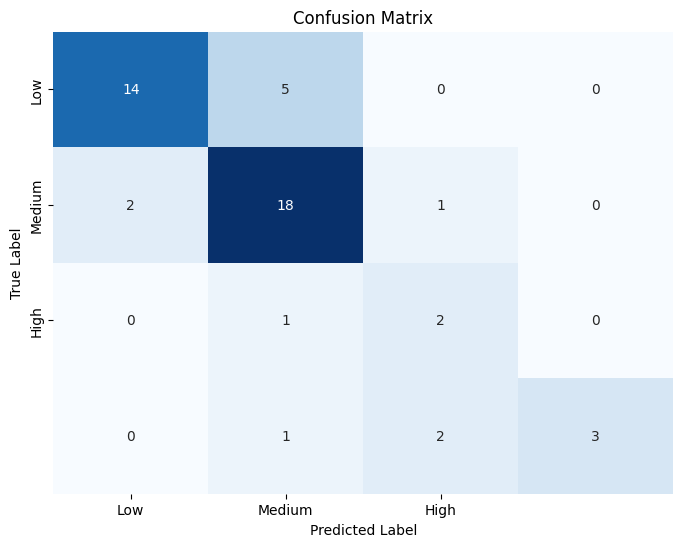

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

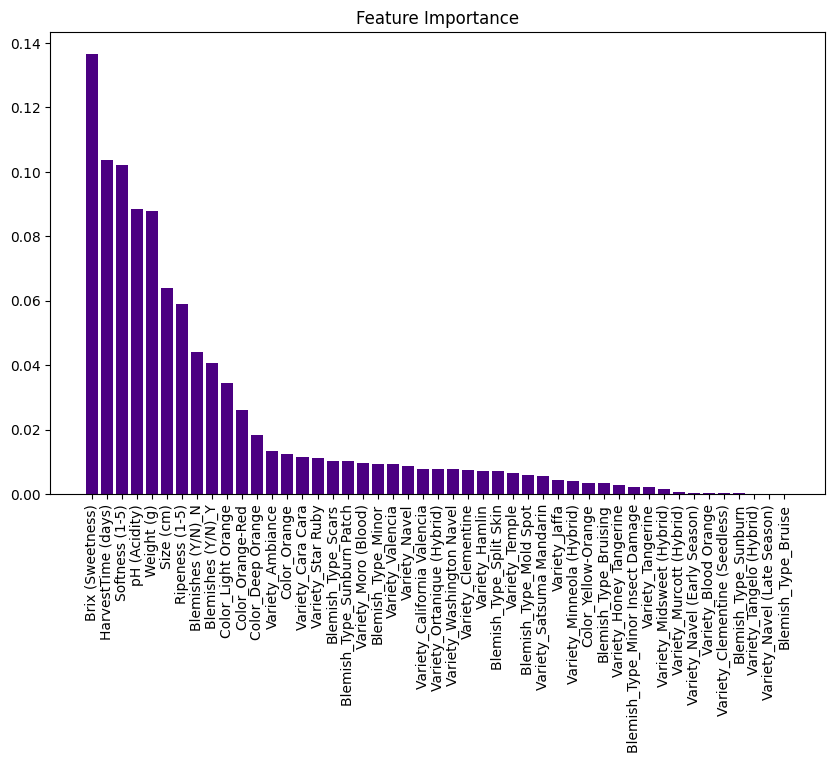

In [ ]:
# Get feature importances
importances = rf_model.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names based on importance
names = [feature_names[i] for i in indices]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

In [ ]:
df = pd.read_csv("Orange Quality Data.csv")
df['Blemish_Type'] = df['Blemishes (Y/N)'].str.extract(r'\((.*?)\)')
df['Blemishes (Y/N)'] = df['Blemishes (Y/N)'].str.replace(r'\(.*?\)', '').str.strip()
df['Blemishes (Y/N)'] = df['Blemishes (Y/N)'].apply(lambda x: 'Y' if x.startswith('Y') else 'N')

# Convert 'Quality (1-5)' to categorical variable
df['Quality_Category'] = pd.cut(df['Quality (1-5)'], bins=[-float('inf'), 2, 3, 4, float('inf')], labels=['Low', 'Low Medium', 'High Medium', 'High'])

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['Color', 'Variety', 'Blemishes (Y/N)', 'Blemish_Type', 'Quality_Category'])

# Prepare the Data
X = df_encoded.drop(columns=['Quality (1-5)', 'Quality_Category_Low', 'Quality_Category_Low Medium', 'Quality_Category_High Medium', 'Quality_Category_High'])
y = df['Quality_Category']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Model
rf_model.fit(X_train, y_train)

# Predict Quality Category
y_pred = rf_model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.7551020408163265
Confusion Matrix:
 [[14  5  0  0]
 [ 2 18  1  0]
 [ 0  1  2  0]
 [ 0  1  2  3]]


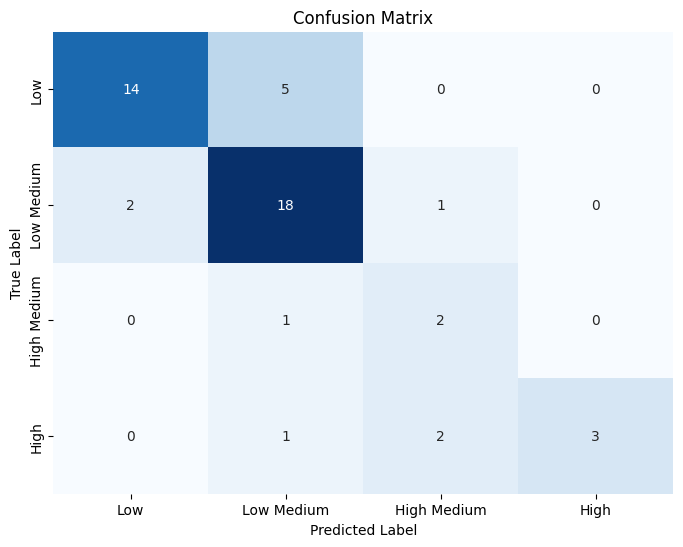

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Low', 'Low Medium', 'High Medium', 'High'],
            yticklabels=['Low', 'Low Medium', 'High Medium', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

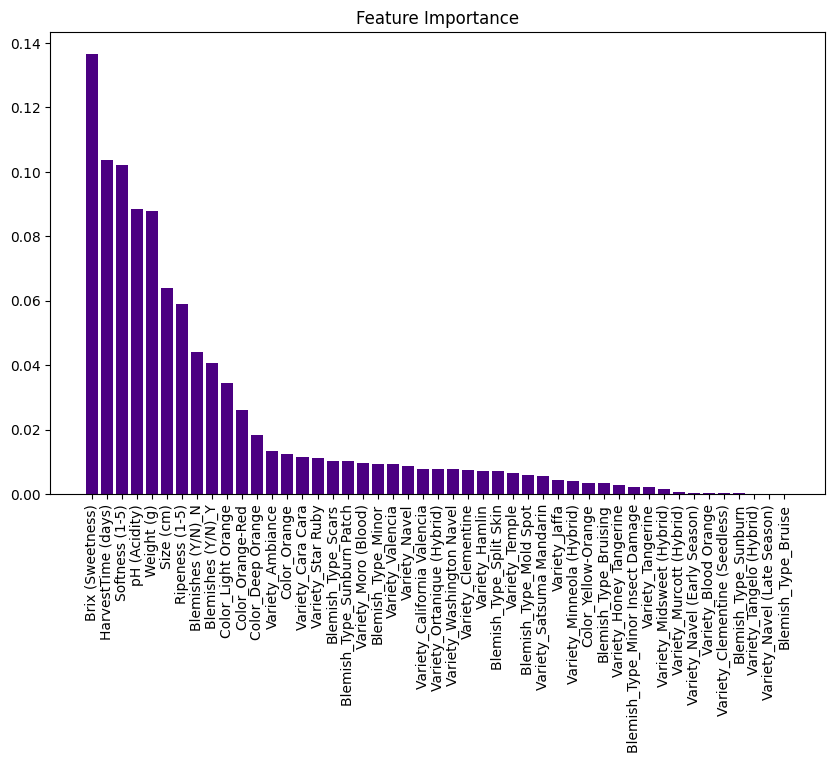

In [ ]:
# Get feature importances
importances = rf_model.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names based on importance
names = [feature_names[i] for i in indices]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

In the above Random Forest Classification models, the Quality (1-5) column was made into a difffernt categorical variable  by determing ranges that would suite a certain description. Now in practive this is not the best way to predict quality, but this could lead us to some further insights on what features are the best at determining quality. In the first model there were only 3 categories (low, medium, and high). A low quality orange was determined to have a quality score of less than 2; a medium quality orange would have a quality score of between 2 and 4; lastly, a high quality orange would have a quality score of above 4.

In this first model there was an accuacy score of about 80 percent. Peeking at the list of features that were most important in this model we can see that Harvest Time, Brix (Sweetness), and Softness were the top three features. Brix (Sweetness) being the leader, and Harvest Time and Softness following behind with similar scores.

In the second model, the number of quality categories increased from 3 to 5 (low, low-medium, low-high, and high). This exploration was prompted by the observation that in the previous model, oranges with quality scores close to each other were being categorized into different quality levels. For instance, an orange with a quality score of 2.9 was labeled as "Low" quality, while another with a score of 3.1 was labeled as "Medium" quality. Such discrepancies indicate that the existing quality categorization might not be the most accurate or fair representation. A low quality orange was less a quality score less than 2, a low-medium was between 2 and 3, a high-medium was between 3 and 4, and a high was above a 4.

In this model the accuarcy score was approximately 76%. When looking at the most important features for determining quality in this model the top three were once again Harvest Time, Brix (Sweetness), and Softness. Brix (Sweetness) was the clear top feature, then followed by Harvest Time, and Softness.



#Chi-Sqaured Test:

In [ ]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Quality (1-5)'], df['Softness (1-5)'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print("chi squared: " + str(chi2))
print("p-value: " + str(p))

chi squared: 199.0148294139833
p-value: 6.682211853312153e-18


In [ ]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Quality (1-5)'], df['HarvestTime (days)'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print("chi squared: " + str(chi2))
print("p-value: " + str(p))

chi squared: 201.1233698112789
p-value: 0.0020299180813933572


In [ ]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Quality (1-5)'], df['Brix (Sweetness)'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print("chi squared: " + str(chi2))
print("p-value: " + str(p))

chi squared: 764.2747795449923
p-value: 5.495639637392613e-08


#K-Means

In [ ]:
df = pd.read_csv("Orange Quality Data.csv")
df['Blemish_Type'] = df['Blemishes (Y/N)'].str.extract(r'\((.*?)\)')
df['Blemishes (Y/N)'] = df['Blemishes (Y/N)'].str.replace(r'\(.*?\)', '').str.strip()
df['Blemishes (Y/N)'] = df['Blemishes (Y/N)'].apply(lambda x: 'Y' if x.startswith('Y') else 'N')

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['Color', 'Variety', 'Blemishes (Y/N)', 'Blemish_Type'])

# Select features for clustering
X_clustering = df_encoded#.drop(columns=['Quality (1-5)'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

In [ ]:
# Specify the number of clusters
n_clusters = 3  # You can change this value based on your analysis

# Initialize K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit K-means clustering on the scaled data
kmeans.fit(X_scaled)

# Get cluster labels
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='rainbow')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

<IPython.core.display.Javascript object>

In [ ]:
# Reduce dimensionality using PCA
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Create a DataFrame with PCA results and cluster labels
df_pca = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
df_pca['Cluster'] = cluster_labels

# Plot clusters in 3D using plotly
fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color='Cluster',
                    title='K-means Clustering in 3D', opacity=0.7)

# Set point size
fig.update_traces(marker=dict(size=3))

fig.show()

In [ ]:
# Add cluster labels to the original dataset
df['Cluster'] = cluster_labels

# Display cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=X_clustering.columns)
print("Cluster Centers:\n", cluster_centers)

Cluster Centers:
    Size (cm)  Weight (g)  Brix (Sweetness)  pH (Acidity)  Softness (1-5)  \
0   0.989026    0.780117         -0.799476      1.063789        0.891364   
1  -0.174167   -0.320406          0.154719     -0.371903       -0.169682   
2  -0.172807    0.194649          0.114496      0.147875       -0.132755   

   HarvestTime (days)  Ripeness (1-5)  Quality (1-5)  Color_Deep Orange  \
0            0.698532       -0.602460      -0.711452          -0.372181   
1           -0.255901        0.336076       0.281383           0.015073   
2            0.118244       -0.310596      -0.157950           0.156286   

   Color_Light Orange  ...  Blemishes (Y/N)_Y  Blemish_Type_Bruise  \
0           -0.098132  ...           0.204206            -0.064550   
1            0.033383  ...          -0.772028            -0.064550   
2           -0.011970  ...           1.295291             0.148553   

   Blemish_Type_Bruising  Blemish_Type_Minor  \
0              -0.196960           -0.257627   

#Cluster Centers:

Cluster 0:
*   Harvest Time: **0.6985** - On the longer side of harvesting time
*   Brix (Sweetness): **-0.7995** - On the less sweet side
*   Softness: **0.8914** - On the softer side
*   Quality: **-0.7115** - On the lesser side of quality

Cluster 1:
*   Harvest Time: **-0.2995** - On the quicker side of harvesting time
*   Brix (Sweetness): **0.2814** - On the moderately sweet side
*   Softness: **-0.1697** - On the less soft side
*   Quality: **0.2814** - On the better side of quality

Cluster 2:
*   Harvest Time: **0.1182** - On the moderately long side of harvesting time, but still quicker than Cluster 0.
*   Brix (Sweetness): **0.1145** - On the sweeter side but less sweet than Cluster 1
*   Softness: **-0.1328** - On the less soft side
*   Quality: **-0.1580** - On the lesser side of quality but still better than Cluster 0.


In [ ]:
# Specify the number of clusters
n_clusters = 2  # You can change this value based on your analysis

# Initialize K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit K-means clustering on the scaled data
kmeans.fit(X_scaled)

# Get cluster labels
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='rainbow')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

<IPython.core.display.Javascript object>

In [ ]:
# Reduce dimensionality using PCA
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Create a DataFrame with PCA results and cluster labels
df_pca = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
df_pca['Cluster'] = cluster_labels

# Plot clusters in 3D using plotly
fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color='Cluster',
                    title='K-means Clustering in 3D', opacity=0.7)

# Set point size
fig.update_traces(marker=dict(size=3))

fig.show()

In [ ]:
# Add cluster labels to the original dataset
df['Cluster'] = cluster_labels

# Display cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=X_clustering.columns)
print("Cluster Centers:\n", cluster_centers)

Cluster Centers:
    Size (cm)  Weight (g)  Brix (Sweetness)  pH (Acidity)  Softness (1-5)  \
0   0.059124    0.297859         -0.067398      0.371548        0.083822   
1  -0.035240   -0.177532          0.040171     -0.221452       -0.049960   

   HarvestTime (days)  Ripeness (1-5)  Quality (1-5)  Color_Deep Orange  \
0            0.211239       -0.410763      -0.258689           0.071797   
1           -0.125904        0.244826       0.154186          -0.042793   

   Color_Light Orange  ...  Blemishes (Y/N)_Y  Blemish_Type_Bruise  \
0           -0.098132  ...           1.295291              0.10830   
1            0.058489  ...          -0.772028             -0.06455   

   Blemish_Type_Bruising  Blemish_Type_Minor  \
0               0.330455            0.386250   
1              -0.196960           -0.230215   

   Blemish_Type_Minor Insect Damage  Blemish_Type_Mold Spot  \
0                          0.268087                0.349083   
1                         -0.159787          

Cluster 0:
*   Harvest Time: **0.2112** - On the moderately longer side of harvesting time
*   Brix (Sweetness): **-0.0674** - On the less sweet side
*   Softness: **0.0838** - On the softer side
*   Quality: **-0.2587** - On the lesser side of quality

Cluste 1:
*   Harvest Time: **-0.1259** - On the shorter side of harvesting time
*   Brix (Sweetness): **0.402** - On the sweeter side
*   Softness: **-0.0500** - On the less soft side
*   Quality: **0.1542** - On the better side of quality

#Conclusion

The analysis of the dataset provided valuable insights into the factors influencing the quality of oranges.

Linear Regression Analysis:
The linear regression model indicated that harvesting time exhibits both positive and negative correlations with specific orange features. Notably, longer harvest times were associated with softer and less sweet oranges.

Random Forest Feature Importance:
The random forest model highlighted the three most significant features in determining orange quality as Harvesting Time, Brix (Sweetness), and Softness. These features collectively play a pivotal role in determining the overall quality of oranges.

K-means Clustering Insights:
K-means clustering further elucidated the relationship between these features and the quality of oranges. On average, oranges of higher quality tend to have a slightly shorter than average harvest time, firmer texture (lower "Softness" rating), and a sweeter taste (higher Brix value).